## Earthquake Damage Data Exploration

### Preliminary Wrangling

> This file explores the damages and deaths caused by earthquakes in the 21st century

In [36]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import us

%matplotlib inline

In [25]:
df = pd.read_csv(r'C:\Users\pc\graduation-project-natural-disasters-main\Project Template\earthquakeDamage.csv', header = 0)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1223 entries, 0 to 1222
Data columns (total 38 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Year                                1223 non-null   int64  
 1   Mo                                  1223 non-null   int64  
 2   Dy                                  1223 non-null   int64  
 3   Hr                                  1222 non-null   float64
 4   Mn                                  1222 non-null   float64
 5   Sec                                 1219 non-null   float64
 6   Tsu                                 241 non-null    float64
 7   Vol                                 11 non-null     float64
 8   Location Name                       1223 non-null   object 
 9   Latitude                            1223 non-null   float64
 10  Longitude                           1223 non-null   float64
 11  Focal Depth (km)                    1212 no

In [27]:
#Delete the unwanted columns from the data
df.drop(['Tsu', 'Vol', 'MMI Int', 'Deaths', 'Death Description', 'Missing', 'Missing Description', 'Injuries', 'Injuries Description',
           'Damage ($Mil)', 'Damage Description', 'Houses Destroyed', 'Houses Destroyed Description', 'Houses Damaged', 'Houses Damaged Description',
           'Total Missing', 'Total Missing Description', 'Total Houses Destroyed', 'Total Houses Destroyed Description'], axis=1, inplace = True)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1223 entries, 0 to 1222
Data columns (total 19 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Year                              1223 non-null   int64  
 1   Mo                                1223 non-null   int64  
 2   Dy                                1223 non-null   int64  
 3   Hr                                1222 non-null   float64
 4   Mn                                1222 non-null   float64
 5   Sec                               1219 non-null   float64
 6   Location Name                     1223 non-null   object 
 7   Latitude                          1223 non-null   float64
 8   Longitude                         1223 non-null   float64
 9   Focal Depth (km)                  1212 non-null   float64
 10  Mag                               1220 non-null   float64
 11  Total Deaths                      493 non-null    float64
 12  Total 

In [29]:
def splitPlace(place):
    strArr = place.split(":")
    country = strArr[0]
    return country

df['country'] = df.apply(lambda x: splitPlace(x['Location Name']), axis = 1)
df.drop(['Location Name'], axis=1, inplace = True)
df.head()

,Year,Mo,Dy,Hr,Mn,Sec,Latitude,Longitude,Focal Depth (km),Mag,Total Deaths,Total Death Description,Total Injuries,Total Injuries Description,Total Damage ($Mil),Total Damage Description,Total Houses Damaged,Total Houses Damaged Description,country
0,2000,1,3,22.0,34.0,12.6,22.132,92.771,33.0,4.6,NaN,NaN,NaN,NaN,NaN,1.0,100.0,2.0,INDIA-BANGLADESH BORDER
1,2000,1,11,23.0,43.0,56.4,40.498,122.994,10.0,5.1,NaN,NaN,30.0,1.0,NaN,3.0,8800.0,4.0,CHINA
2,2000,1,14,23.0,37.0,7.8,25.607,101.063,33.0,5.9,7.0,1.0,2528.0,4.0,73.5,4.0,NaN,NaN,CHINA
3,2000,2,2,22.0,58.0,1.5,35.288,58.218,33.0,5.3,1.0,1.0,15.0,1.0,NaN,2.0,300.0,3.0,IRAN
4,2000,2,7,19.0,34.0,57.0,-26.288,30.888,5.0,4.5,NaN,NaN,1.0,1.0,NaN,1.0,NaN,NaN,SOUTH AFRICA; SWAZILAND


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1223 entries, 0 to 1222
Data columns (total 19 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Year                              1223 non-null   int64  
 1   Mo                                1223 non-null   int64  
 2   Dy                                1223 non-null   int64  
 3   Hr                                1222 non-null   float64
 4   Mn                                1222 non-null   float64
 5   Sec                               1219 non-null   float64
 6   Latitude                          1223 non-null   float64
 7   Longitude                         1223 non-null   float64
 8   Focal Depth (km)                  1212 non-null   float64
 9   Mag                               1220 non-null   float64
 10  Total Deaths                      493 non-null    float64
 11  Total Death Description           493 non-null    float64
 12  Total 

In [22]:
df.rename(columns={'Total Deaths': 'TotalDeaths', 'Total Death Description': 'TotalDeathDescription',
                     'Total Injuries Description': 'TotalInjuriesDescription', 'Total Damage Description': 'TotalDamageDescription',
                     'Total Houses Damaged Description': 'TotalHousesDamagedDescription'}, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1223 entries, 0 to 1222
Data columns (total 38 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Year                                1223 non-null   int64  
 1   Mo                                  1223 non-null   int64  
 2   Dy                                  1223 non-null   int64  
 3   Hr                                  1222 non-null   float64
 4   Mn                                  1222 non-null   float64
 5   Sec                                 1219 non-null   float64
 6   Tsu                                 241 non-null    float64
 7   Vol                                 11 non-null     float64
 8   Latitude                            1223 non-null   float64
 9   Longitude                           1223 non-null   float64
 10  Focal Depth (km)                    1212 non-null   float64
 11  Mag                                 1220 no

In [31]:
df = df[df['Mag'].notna()]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1220 entries, 0 to 1222
Data columns (total 19 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Year                              1220 non-null   int64  
 1   Mo                                1220 non-null   int64  
 2   Dy                                1220 non-null   int64  
 3   Hr                                1219 non-null   float64
 4   Mn                                1219 non-null   float64
 5   Sec                               1217 non-null   float64
 6   Latitude                          1220 non-null   float64
 7   Longitude                         1220 non-null   float64
 8   Focal Depth (km)                  1210 non-null   float64
 9   Mag                               1220 non-null   float64
 10  Total Deaths                      491 non-null    float64
 11  Total Death Description           491 non-null    float64
 12  Total 

In [32]:
df['Total Death Description'].fillna(0, inplace = True)
df['Total Injuries Description'].fillna(0, inplace = True)
df['Total Damage Description'].fillna(0, inplace = True)
df['Total Houses Damaged Description'].fillna(0, inplace = True)
df['Total Injuries'].fillna(0, inplace = True)
df['Total Damage ($Mil)'].fillna(0, inplace = True)
df['Total Houses Damaged'].fillna(0, inplace = True)
df['Total Deaths'].fillna(0, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1220 entries, 0 to 1222
Data columns (total 19 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Year                              1220 non-null   int64  
 1   Mo                                1220 non-null   int64  
 2   Dy                                1220 non-null   int64  
 3   Hr                                1219 non-null   float64
 4   Mn                                1219 non-null   float64
 5   Sec                               1217 non-null   float64
 6   Latitude                          1220 non-null   float64
 7   Longitude                         1220 non-null   float64
 8   Focal Depth (km)                  1210 non-null   float64
 9   Mag                               1220 non-null   float64
 10  Total Deaths                      1220 non-null   float64
 11  Total Death Description           1220 non-null   float64
 12  Total 

In [40]:
state_names = [state.name for state in us.states.STATES_AND_TERRITORIES]

for i in range(len(state_names)):
    state_names[i] = state_names[i].upper()

def changeCountry(stateName):
    if stateName in state_names or stateName in state_abbr:
        return 'United States'
    else:
        return stateName
    
    
df['country'] = df.apply(lambda x: changeCountry(x['country']), axis = 1)

In [42]:
df.to_csv('damage.csv')

## Univariate Exploration

> In this section, investigate distributions of individual variables. If you see unusual points or outliers, take a deeper look to clean things up and prepare yourself to look at relationships between variables.

In [11]:
df.describe()

,Year,Mo,Dy,Hr,Mn,Sec,Latitude,Longitude,Focal Depth (km),Mag,TotalDeaths,TotalDeathDescription,TotalInjuriesDescription,TotalDamageDescription,TotalHousesDamagedDescription
count,1220.000000,1220.000000,1220.000000,1219.000000,1219.000000,1217.000000,1220.000000,1220.000000,1210.000000,1220.000000,1220.000000,1220.000000,1220.000000,1220.000000,1220.000000
mean,2010.099180,6.485246,15.640164,11.402789,29.387203,28.547247,17.663142,50.830175,31.060331,5.952951,673.148361,0.513115,0.973770,1.553279,1.161475
std,5.861891,3.473412,8.704474,7.143338,17.507897,17.608726,24.349903,87.516043,64.731414,1.057137,11689.663668,0.777446,1.125861,1.209593,1.473637
min,2000.000000,1.000000,1.000000,0.000000,0.000000,0.000000,-61.825000,-179.971000,0.000000,1.600000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2005.000000,3.000000,8.000000,5.000000,14.000000,13.000000,-1.392750,11.480000,10.000000,5.200000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,2010.000000,7.000000,16.000000,11.000000,29.000000,27.900000,25.582500,73.423500,14.000000,5.900000,0.000000,0.000000,1.000000,1.000000,0.000000
75%,2015.000000,9.000000,23.000000,18.000000,45.000000,43.700000,36.881250,119.996250,32.000000,6.700000,2.000000,1.000000,1.000000,2.000000,2.000000
max,2021.000000,12.000000,31.000000,23.000000,59.000000,59.900000,64.004000,179.444000,675.000000,9.100000,316000.000000,4.000000,4.000000,4.000000,4.000000


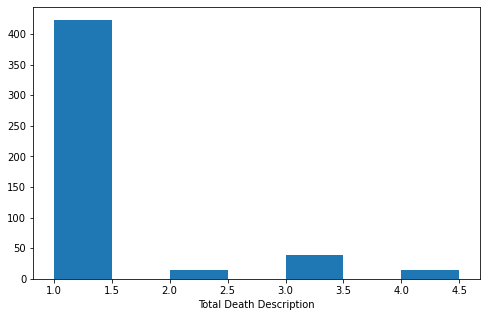

In [12]:
#Plot magnitude on a standard scale
binsize = 0.5
bins = np.arange(1, df['TotalDeathDescription'].max()+1, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'TotalDeathDescription', bins = bins)
plt.xlabel('Total Death Description')
plt.show()

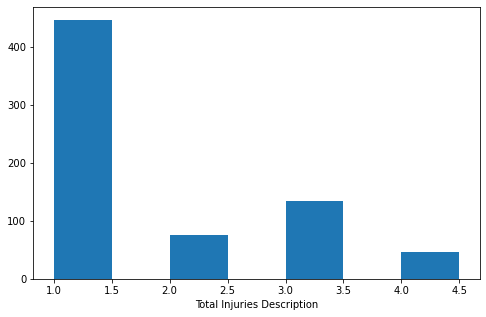

In [14]:
#Plot magnitude on a standard scale
binsize = 0.5
bins = np.arange(1, df['TotalInjuriesDescription'].max()+1, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'TotalInjuriesDescription', bins = bins)
plt.xlabel('Total Injuries Description')
plt.show()

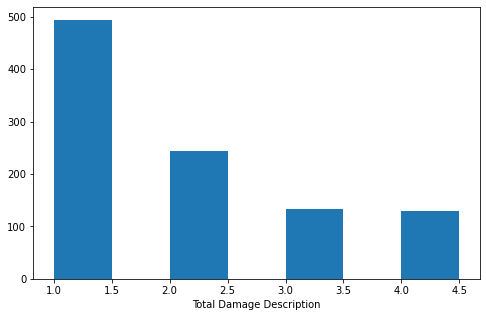

In [15]:
#Plot magnitude on a standard scale
binsize = 0.5
bins = np.arange(1, df['TotalDamageDescription'].max()+1, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'TotalDamageDescription', bins = bins)
plt.xlabel('Total Damage Description')
plt.show()

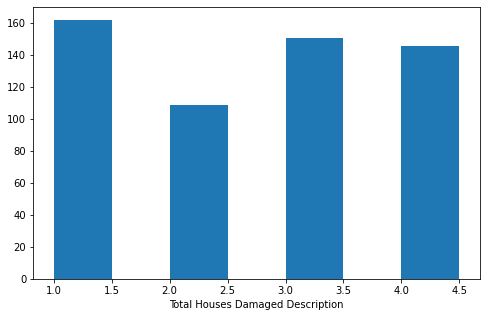

In [16]:
#Plot magnitude on a standard scale
binsize = 0.5
bins = np.arange(1, df['TotalHousesDamagedDescription'].max()+1, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'TotalHousesDamagedDescription', bins = bins)
plt.xlabel('Total Houses Damaged Description')
plt.show()

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your data. Make sure the variables that you cover here have been introduced in some fashion in the previous section (univariate exploration).

In [19]:
numeric_vars = ['Mag', 'Focal Depth (km)', 'TotalDeaths', 'TotalDeathDescription', 'TotalInjuriesDescription',
                'TotalDamageDescription', 'TotalHousesDamagedDescription']

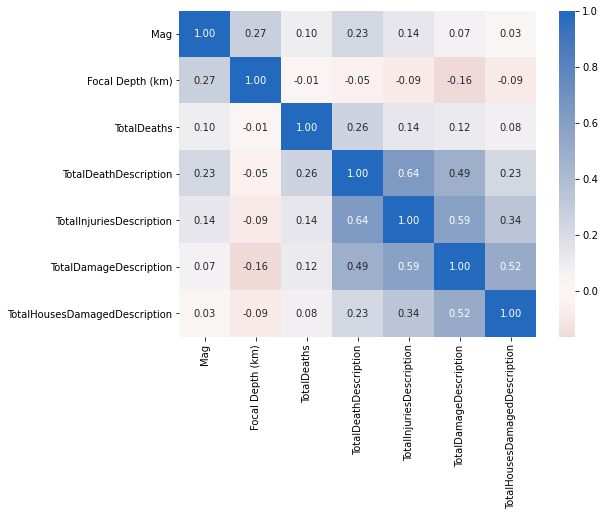

In [20]:
# correlation plot
plt.figure(figsize = [8, 6])
sb.heatmap(df[numeric_vars].corr(), annot = True, fmt = '.2f', cmap = 'vlag_r', center = 0);

<AxesSubplot:xlabel='country', ylabel='count'>

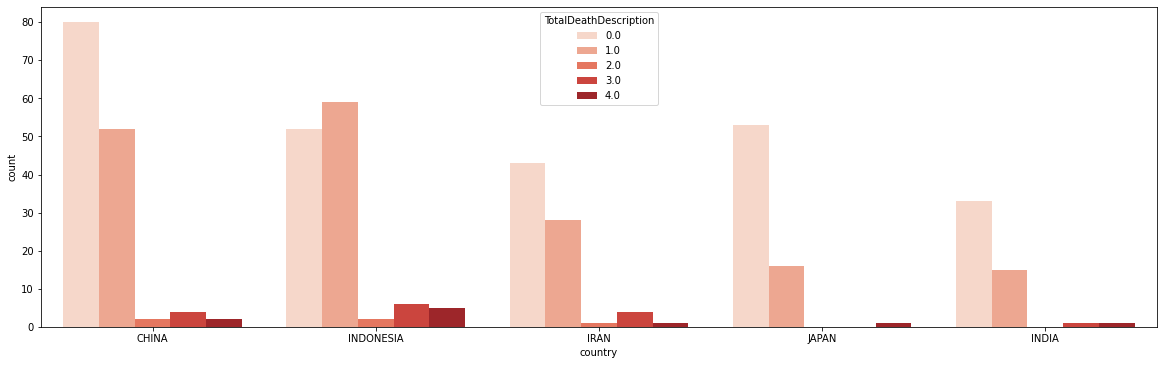

In [21]:
plt.figure(figsize = [20, 20])


plt.subplot(3, 1, 1)
sb.countplot(data = df, x = 'country', hue = 'TotalDeathDescription', palette = 'Reds', order=pd.value_counts(df['country']).iloc[:5].index)

<AxesSubplot:xlabel='country', ylabel='count'>

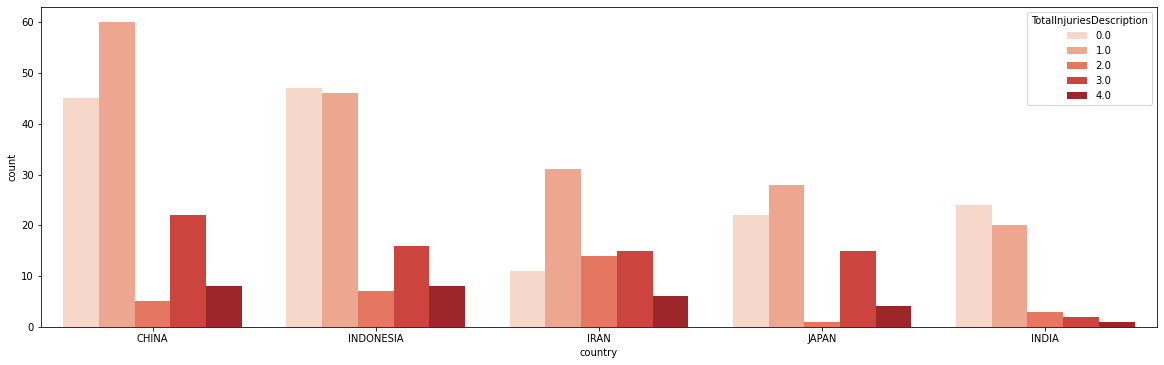

In [23]:
plt.figure(figsize = [20, 20])


plt.subplot(3, 1, 1)
sb.countplot(data = df, x = 'country', hue = 'TotalInjuriesDescription', palette = 'Reds', order=pd.value_counts(df['country']).iloc[:5].index)

<AxesSubplot:xlabel='country', ylabel='count'>

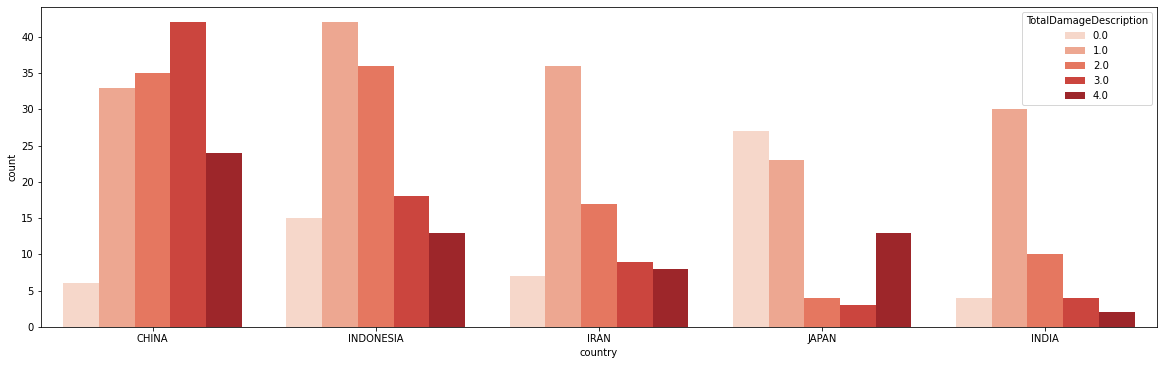

In [26]:
plt.figure(figsize = [20, 20])


plt.subplot(3, 1, 1)
sb.countplot(data = df, x = 'country', hue = 'TotalDamageDescription', palette = 'Reds', order=pd.value_counts(df['country']).iloc[:5].index)

<AxesSubplot:xlabel='country', ylabel='count'>

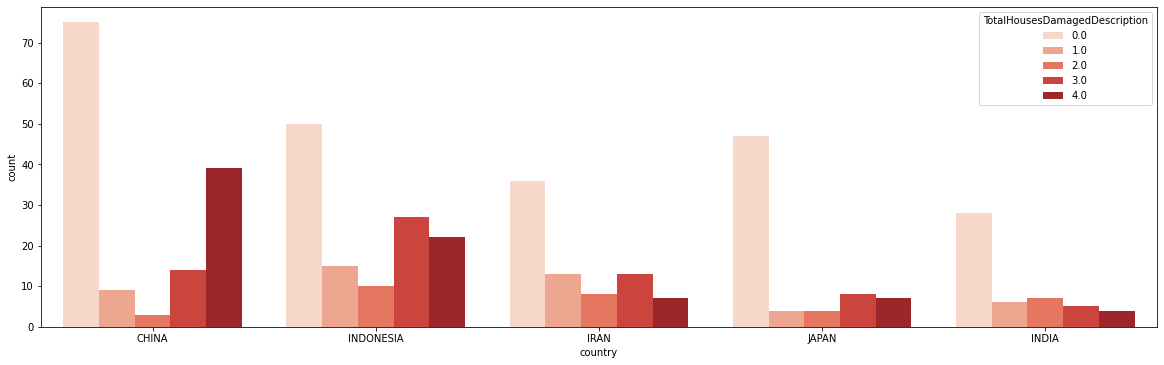

In [25]:
plt.figure(figsize = [20, 20])


plt.subplot(3, 1, 1)
sb.countplot(data = df, x = 'country', hue = 'TotalHousesDamagedDescription', palette = 'Reds', order=pd.value_counts(df['country']).iloc[:5].index)